In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as r

import tensorflow as tf
from tensorflow.keras import layers

2023-09-22 19:59:13.915029: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-22 19:59:13.956979: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-22 19:59:13.957537: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-22 19:59:14.719401: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train/255
x_test = x_test/255

In [3]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (4, 4), activation="relu", input_shape=(32, 32, 3)),
    layers.MaxPooling2D((3, 3)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [4]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [5]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10


2023-09-22 19:59:17.573585: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


313/313 [==============================] - 9s 26ms/step - loss: 1.6034 - accuracy: 0.4182 - val_loss: 1.3496 - val_accuracy: 0.5244
Epoch 2/10
313/313 [==============================] - 7s 24ms/step - loss: 1.2504 - accuracy: 0.5560 - val_loss: 1.1982 - val_accuracy: 0.5815
Epoch 3/10
313/313 [==============================] - 7s 24ms/step - loss: 1.1408 - accuracy: 0.5986 - val_loss: 1.1899 - val_accuracy: 0.5936
Epoch 4/10
313/313 [==============================] - 8s 25ms/step - loss: 1.0401 - accuracy: 0.6373 - val_loss: 1.0764 - val_accuracy: 0.6260
Epoch 5/10
313/313 [==============================] - 9s 28ms/step - loss: 0.9720 - accuracy: 0.6577 - val_loss: 1.0399 - val_accuracy: 0.6331
Epoch 6/10
313/313 [==============================] - 9s 28ms/step - loss: 0.9194 - accuracy: 0.6780 - val_loss: 1.0582 - val_accuracy: 0.6374
Epoch 7/10
313/313 [==============================] - 9s 28ms/step - loss: 0.8704 - accuracy: 0.6936 - val_loss: 1.0058 - val_accuracy: 0.6504
Epoch 8/10

In [6]:
probabilities = model.predict(x_test)
predictions = np.argmax(probabilities, axis=1)

313/313 [==============================] - 1s 3ms/step


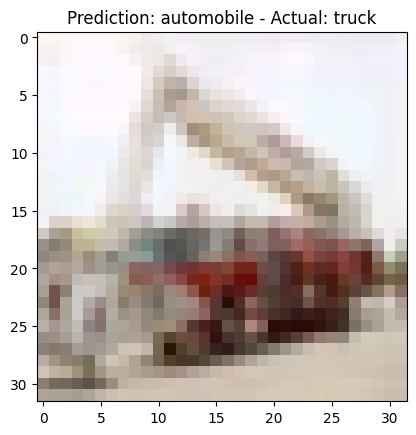

In [24]:
index = r.randint(0, len(y_test))

labels = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]

plt.imshow(x_test[index])
plt.title(f"Prediction: {labels[predictions[index]]} - Actual: {labels[y_test[index][0]]}")
plt.show()